# 2.2.7 Funciones Teóricas de Probabilidad

In [ ]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd
import numpy as np

import math

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import poisson, norm, lognorm, t, chi2, f, expon, weibull_min

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings("ignore")

Hasta ahora, los ejemplos presentados han sido resueltos a partir de la noción de probabilidad como frecuencia; es decir, la probabilidad ha sido calculada mediante el conteo de los eventos posibles en el universo. Sin embargo, esta aproximación no puede ser usada en todos los casos. Las funciones teóricas de probabilidad son funciones matemáticas que asocian una probabilidad específica a cada punto del dominio de la función y permiten representar muchas situaciones del mundo real. En este tutorial se presentan las principales funciones de probabilidad, las cuales serán usadas posteriormente dentro de la solución de muchos casos de aplicación en Analítica Predictiva.

## Definiciones básicas

### Espacio muestral

Es el conjunto $S$ de todos los posibles resultados de un experimento.

### Función de probabilidad

Dado un espacio muestral $S$ y un conjunto de eventos $A_i$ mutuamente exclusivos y colectivamente exhasutivos, una función de probabilidad es una función Pr cualquiera que:

$$ Pr(A_i)≥0, ∀ A ∈S $$

$$ Pr(S)=1 $$

### Variable aleatoria

Una variable aleatoria $X$ es una función que mapea el espacio muestral en los números reales.

### Función de distribución acumulada de $X$ o $FX(x)$

Es la función

$$ F_X(x)=PrX(X≤x),∀x $$

Tal que:

$lim x→−∞ F_X(x)=0 y lim x→∞ F_X(x)=1$

$F_X(x)$ es no una función no decreciente de x.

$F_X(x)$ es continua por la derecha (existencia).

### Función de masa de probabilidad

La función de masa de probabilidad fX(s) de una variable aleatoria discreta X es dada por:

$$ f_X(x)=Pr(X=x),∀x $$

### Función de densidad de probabilidad

La función fX(x) para una variable aleatoria continua X es una función que satisface con:

$$ F_X(x)=\int_{x}^{∞}f_X(t)dt,∀x $$

### Valor esperado

El valor esperado o media de una variable aleatoria $g(X)$, denotado como $Eg(X)$, es:

$$
\begin{align}

Eg(X)=\begin{Bmatrix}
 \int_{-\infty}^{\infty} g(x)fX(x), & Si X es continua 
 
 \\ 
 
 \sum_{x \varepsilon X}^{} g(x)fX(x)=g(x)Pr(X=x), & Si X es discreta
\end{Bmatrix}

\end{align}
$$

### Momentos de una distribución

- El n-ésimo momento se define como:

$$ M_n=E(x^n)=\int_{}{}u^nf_X(t)dt $$

- Media o valor esperado:

$$ E(x)=\mu_x=\int_{}{}u⋅f_X(t)dt=M_1 $$

- Varianza:

$$ V(x)=\sigma_x^2=E[(x−\mu)^2]=M_2−M_1^2 $$

- Simetría:

$$ S_x=E[(x−\mu)^3]=M_3−3M_2M_1+2M_1^3 $$

- Curtosis:

$$ K_x=E[(x−\mu)^4]=M_4−4M_3M_1+6M_2M_1^2−3M_1^4 $$

### Interpretación gráfica

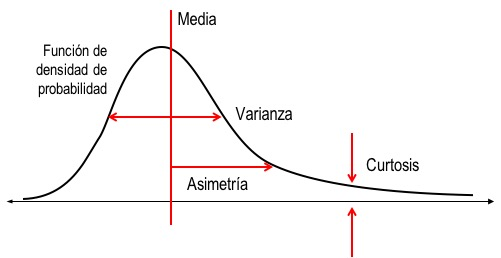

## Principales distribuciones de probabilidad

### Distribución de Bernoulli

En esta distribución se tiene un experiemento en el cual hay dos y solo dos resultados posibles. Una variable aleatoria $X$ sigue una distribución de Bernoulli de orden $p$ si:

$$
\begin{align}

X=\begin{Bmatrix}
 1, & con probabilidad p 
 
 \\ 
 
 0, & con probabilidad 1−p
\end{Bmatrix}

\end{align}
$$

con:

$$ E(X)=1p+0(1−p)=p $$

$$ Var(X)=(1−p)^2p+(0−p)^2(1−p)=p(1−p) $$

In [ ]:
#
# Simulación de 5 tiradas de una moneda
#
np.random.seed(123456)

random_numbers = np.random.random(size=5)
display(random_numbers)
heads = random_numbers < 0.5
display(heads)

### Distribución Binomial

La distribución binomial se obtiene al considerar una secuencia de n experimentos independientes de Bernoulli y se obtienen exactamente $Y$ éxitos, es decir, ocurre $X=1$, y veces. En otras palabras, si se tiene una secuencia de n experimentos idénticos, cada uno con una probabilidad de éxito $p$, y se definen las variables aleatorias $X_1, …, X_n$ como:

$$
\begin{align}

X=\begin{Bmatrix}
 1, & con probabilidad p 
 
 \\ 
 
 0, & con probabilidad 1−p
\end{Bmatrix}

\end{align}
$$

La variable aleatoria

$$ Y=\sum_{i=1}^nX_i $$

sigue una distribución binomial $(n, p)$.

In [ ]:
#
# Simulación del número de exitos en 5 tiradas de
# una moneda
#
np.random.binomial(5, 0.5)

In [ ]:
#
# Simulación del número de éxitos en 5 tiradas de
# una moneda repetido 10 veces.
#
np.random.binomial(5, 0.5, 10)

In [ ]:
#
# Función de densidad de probabilidad simulada
#
samples = np.random.binomial(60, 0.5, 10000)
sns.histplot(samples, discrete=True, shrink=0.2, stat="density")
sns.despine(trim=True, offset=2)
plt.show()

### Distribución Uniforme Discreta

Una variable aletoria $X$ tiene una distribución discreta uniforme $(1, N)$ si:

$$ Pr(X=x|N)=\frac{1}{N},x=1,...,N $$

donde N es un entero.

$$ E(X)=\frac{N+1}{2} $$

$$ Var(X)=\frac{(N+1)(N−1)}{12} $$

In [ ]:
# Especifica el rango de valores posibles y la cantidad de muestras que deseas generar
min_value = 1
max_value = 6  # Por ejemplo, para simular un dado de 6 caras
num_samples = 10  # Cantidad de números aleatorios que deseas generar

# Genera números aleatorios uniformes discretos
uniform_discrete_samples = np.random.randint(min_value, max_value + 1, num_samples)
uniform_discrete_samples

In [ ]:
#
# Función de densidad de probabilidad simulada
#
samples = np.random.randint(0, 10 + 1, 100000)
sns.histplot(samples, discrete=True, shrink=0.2, stat="density")
sns.despine(trim=True, offset=2)
plt.show()

### Distribución Poisson

Esta distribución se usa para modelar el número de ocurrencias de un evento en un intervalo de tiempo. Una variable X sigue una distribución de Poisson(λ), si:

$$ P(X=x|λ)=\frac{exp(−λ)∗λx}{x!},x=0,1,...$$

con:

$$ E(X)=Var(X)=λ $$

In [ ]:
# Parámetros de la distribución de Poisson
lambda_parameter = 3  # Parámetro lambda que representa la tasa de ocurrencia de eventos

# Genera números aleatorios que siguen una distribución de Poisson
num_samples = 10  # Cantidad de muestras a generar
poisson_samples = np.random.poisson(lambda_parameter, num_samples)
poisson_samples

In [ ]:
#
# Función de densidad de probabilidad simulada
#
samples = np.random.poisson(lambda_parameter, 10000)
sns.histplot(samples, discrete=True, shrink=0.2, stat="density")
sns.despine(trim=True, offset=2)
plt.show()

In [ ]:
# Nivel de confianza del intervalo
confidence_level = 0.90

# Crear una variable aleatoria con una distribución de Poisson
rv = poisson(lambda_parameter)

# Calcular los intervalos de confianza del 95%
confidence_interval = rv.interval(confidence_level)

# Definir valores x para graficar
x = np.arange(0, int(confidence_interval[1]) + 1)

# Calcular la PMF (función de masa de probabilidad) de la distribución de Poisson
pmf = rv.pmf(x)

# Graficar la PMF
plt.bar(x, pmf, label='PMF', alpha=0.7, color='blue', width=0.5)

# Etiquetas y título
plt.xlabel('Número de Eventos')
plt.ylabel('Probabilidad')
plt.title(f'Distribución de Poisson con Intervalo de Confianza del {confidence_level * 100}%')

# Mostrar la gráfica
plt.legend()
plt.grid(True)
plt.show()

# Imprimir el intervalo de confianza
print(f"Intervalo de confianza del {confidence_level * 100}%: ({confidence_interval[0]}, {confidence_interval[1]})")

### Distribución Normal

La función de densidad de probabilidad de una distribución normal con media $μ$ y varianza $σ^2$ se define como:

$$ f(x|μ,σ^2)=\frac{1}{σ\sqrt{2π}}exp{\frac{−1(x−μ)^2}{2σ^2}} $$

Para la distribución normal:

$$ M1=μ, M2=σ^2, M3=0, M4=3σ^2 $$

En la siguiente figura se observan diferentes distribuciones normales que varian en su media y varianza.

In [ ]:
plt.figure(figsize=(8, 6))
x = np.linspace(-4, +4, 100)
plt.plot(x, norm.pdf(x, loc=0.0, scale=math.sqrt(0.2)), "r-", lw=2, alpha=0.6, label="")
plt.plot(
    x, norm.pdf(x, loc=-2.0, scale=math.sqrt(0.5)), "b-", lw=2, alpha=0.6, label=""
)
plt.plot(x, norm.pdf(x, loc=0.0, scale=math.sqrt(1.0)), "k-", lw=2, alpha=0.6, label="")
plt.gca().spines["left"].set_color("gray")
plt.gca().spines["bottom"].set_color("gray")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.show()

#### Propiedades útiles:

- Sean $x∼N(μx,σ^2x)$ y $y∼N(μy,σ^2y)$, entonces:

$$ x+y∼N(\mu x + \mu y,\sigma^2x+\sigma^2y) $$

- Sea $x∼N(\mu x,\sigma^2x)$ y los números reales arbitrarios $a$ y $b$, entonces:

$$ ax+b∼N(a\mu_x+b,a^2\sigma_x^2) $$

- Sean $x∼N(\mu_x,\sigma_x^2)$ y $ε∼N(0,1^2)$ , entonces:

$$ x∼\mu+\sigma \epsilon $$


### Distribución Normal Estándar

La distribución normal estándar se obtiene al hacer $\mu =0$ y $\sigma=1$ en la distribución normal:

$$ f(z)=\frac{1}{\sqrt{2π}}*exp{\frac{−1z^2}{2}} $$

**Intevalos de confianza**. Corresponden a los valores de x para los cuales el área central de la normal es igual al porcentaje especificado. En la imagen presentada a continuación se grafican los intervalos de confianza para $±3\sigma$, $±2\sigma$ y $±\sigma$, que equivalen a áreas del 99.73%, 95.44% y 68.26% respectivamente.

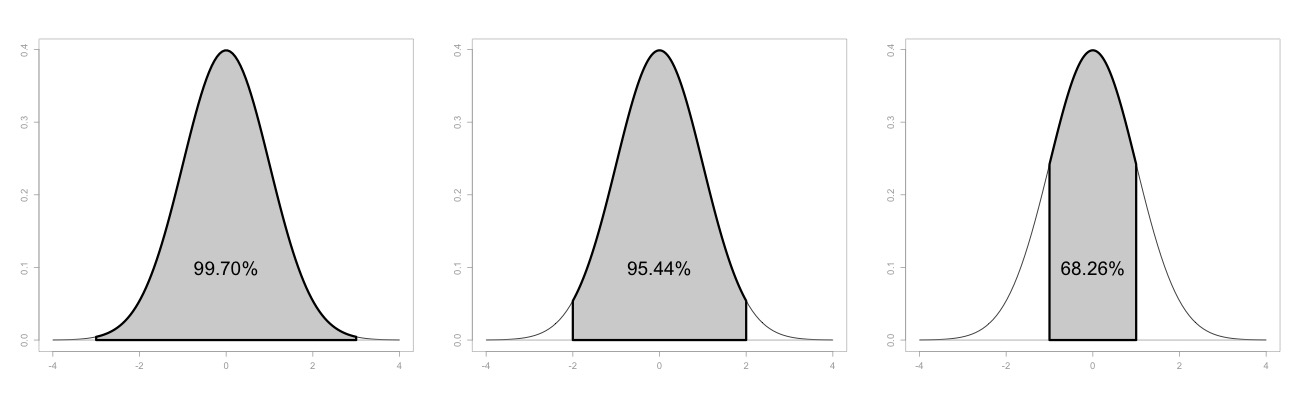

Los valores del área para cada caso se calcularían asi:

In [ ]:
# para +/- 3 * sigma
1.0 - 2 * norm.cdf(-3)

In [ ]:
# para +/- 2 * sigma
1.0 - 2 * norm.cdf(-2)

In [ ]:
# para +/- 1 * sigma
1.0 - 2 * norm.cdf(-1)

### Distribución Lognormal

La variable aleatoria x sigue una distribución lognormal si:

$$ log(x)∼N(\mu,\sigma^2) $$

In [ ]:
# Parámetros de la distribución log-normal
mu = 1.0  # Media de la distribución log-normal en la escala logarítmica
sigma = 0.5  # Desviación estándar de la distribución log-normal en la escala logarítmica
num_samples = 10000  # Cantidad de muestras a generar
samples = np.random.lognormal(mu, sigma, num_samples)

#
# Función de densidad de probabilidad simulada
#
sns.histplot(samples, discrete=True, shrink=0.2, stat="density")
sns.despine(trim=True, offset=2)
plt.show()

In [ ]:
# Parámetros de la distribución log-normal
mu = 1.0  # Media de la distribución log-normal en la escala logarítmica
sigma = 1.0  # Desviación estándar de la distribución log-normal en la escala logarítmica
num_samples = 10000  # Cantidad de muestras a generar
samples = np.random.lognormal(mu, sigma, num_samples)

#
# Función de densidad de probabilidad simulada
#
sns.histplot(samples, discrete=True, shrink=0.2, stat="density")
sns.despine(trim=True, offset=2)
plt.show()

In [ ]:
# Parámetros de la distribución log-normal
mu = 1.5  # Media de la distribución log-normal en la escala logarítmica
sigma = 0.5  # Desviación estándar de la distribución log-normal en la escala logarítmica
num_samples = 10000  # Cantidad de muestras a generar
samples = np.random.lognormal(mu, sigma, num_samples)

#
# Función de densidad de probabilidad simulada
#
sns.histplot(samples, discrete=True, shrink=0.2, stat="density")
sns.despine(trim=True, offset=2)
plt.show()

In [ ]:
confidence_level = 0.95

# Parámetros de la distribución log-normal
mu = 1.5  # Media en la escala logarítmica
sigma = 0.5  # Desviación estándar en la escala logarítmica

# Crear una variable aleatoria con una distribución log-normal
rv = lognorm(s=sigma, scale=np.exp(mu))

# Calcular los intervalos de confianza del 95%
confidence_interval = rv.interval(confidence_level)
print(f"Intervalo de confianza del {confidence_level * 100}%: {confidence_interval}")

In [ ]:
# Definir valores x para graficar
x = np.linspace(0, 30, 1000)

# Calcular la PDF de la distribución log-normal para los valores x
pdf = rv.pdf(x)

# Graficar la PDF
plt.plot(x, pdf, 'b-', lw=2, label='PDF')

# Rellenar la región de los intervalos de confianza del 95%
plt.fill_between(x, 0, pdf, where=(x >= confidence_interval[0]) & (x <= confidence_interval[1]), alpha=0.2, color='green', label=f'Intervalo de Confianza {confidence_level * 100}%')

# Etiquetas y leyenda
plt.xlabel('Valor')
plt.ylabel('Densidad de probabilidad')
plt.title(f'Distribución Log-Normal con Intervalo de Confianza del {confidence_level * 100}%')
plt.legend()
plt.grid(True)

# Mostrar la gráfica
plt.show()

### Distribución t de Student:

Sean $x_i,...,x_n ∼ N(\mu,\sigma^2)$, entonces:

$$ \frac{M_1− \mu_1}{\sqrt{\frac{1}{n}M2}} ∼ t_{n−1} $$

Esta distribución tiene una forma similar a la distribución normal pero un poco más delgada y con colas más pesadas, haciéndose más similar a la distribución normal conforme n aumenta. Históricamente fue derivada como la aproximación a la distribución de probabilidades de la media de $n$ datos provenientes de una distribución con media $\mu$ y varianza $\sigma^2$.


In [ ]:
# Grados de libertad de la distribución t
degrees_of_freedom = 3  # Puedes ajustar este valor

# Nivel de confianza del intervalo
confidence_level = 0.95

# Valores para la gráfica
x = np.linspace(-4, 4, 1000)

# Calcula la PDF de la distribución t
pdf = t.pdf(x, df=degrees_of_freedom)

# Calcula los valores críticos para el intervalo de confianza
alpha = 1 - confidence_level
critical_value = t.ppf(1 - alpha / 2, df=degrees_of_freedom)

# Graficar la PDF
plt.plot(x, pdf, 'b-', lw=2, label='PDF')

# Rellenar la región correspondiente al intervalo de confianza del 95%
plt.fill_between(x, 0, pdf, where=(x >= -critical_value) & (x <= critical_value), alpha=0.2, color='green', label=f'Intervalo de Confianza {confidence_level * 100}%')

# Etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title(f'Distribución t de Student con Intervalo de Confianza del {confidence_level * 100}%')

# Mostrar la gráfica
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los valores críticos
print(f"Valores críticos para el intervalo de confianza del {confidence_level * 100}%: ±{critical_value:.3f}")

In [ ]:
# Grados de libertad de la distribución t
degrees_of_freedom = 5  # Puedes ajustar este valor

# Nivel de confianza del intervalo
confidence_level = 0.95

# Valores para la gráfica
x = np.linspace(-4, 4, 1000)

# Calcula la PDF de la distribución t
pdf = t.pdf(x, df=degrees_of_freedom)

# Calcula los valores críticos para el intervalo de confianza
alpha = 1 - confidence_level
critical_value = t.ppf(1 - alpha / 2, df=degrees_of_freedom)

# Graficar la PDF
plt.plot(x, pdf, 'b-', lw=2, label='PDF')

# Rellenar la región correspondiente al intervalo de confianza del 95%
plt.fill_between(x, 0, pdf, where=(x >= -critical_value) & (x <= critical_value), alpha=0.2, color='green', label=f'Intervalo de Confianza {confidence_level * 100}%')

# Etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title(f'Distribución t de Student con Intervalo de Confianza del {confidence_level * 100}%')

# Mostrar la gráfica
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los valores críticos
print(f"Valores críticos para el intervalo de confianza del {confidence_level * 100}%: ±{critical_value:.3f}")

In [ ]:
# Grados de libertad de la distribución t
degrees_of_freedom = 10  # Puedes ajustar este valor

# Nivel de confianza del intervalo
confidence_level = 0.95

# Valores para la gráfica
x = np.linspace(-4, 4, 1000)

# Calcula la PDF de la distribución t
pdf = t.pdf(x, df=degrees_of_freedom)

# Calcula los valores críticos para el intervalo de confianza
alpha = 1 - confidence_level
critical_value = t.ppf(1 - alpha / 2, df=degrees_of_freedom)

# Graficar la PDF
plt.plot(x, pdf, 'b-', lw=2, label='PDF')

# Rellenar la región correspondiente al intervalo de confianza del 95%
plt.fill_between(x, 0, pdf, where=(x >= -critical_value) & (x <= critical_value), alpha=0.2, color='green', label=f'Intervalo de Confianza {confidence_level * 100}%')

# Etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title(f'Distribución t de Student con Intervalo de Confianza del {confidence_level * 100}%')

# Mostrar la gráfica
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los valores críticos
print(f"Valores críticos para el intervalo de confianza del {confidence_level * 100}%: ±{critical_value:.3f}")

### Distribución Chi-cuadrada

Sea $z_i∼N(0,1)$, para $i=1,...,n$, entonces:

$$ z_1^2 + z_2^2 + … + z_n^2 ∼ χ_n^2 $$

In [ ]:
# Grados de libertad de la distribución chi-cuadrado
degrees_of_freedom = 5  # Puedes ajustar este valor

# Nivel de confianza del intervalo
confidence_level = 0.95

# Valores para la gráfica
x = np.linspace(0, 20, 1000)

# Calcula la PDF de la distribución chi-cuadrado
pdf = chi2.pdf(x, df=degrees_of_freedom)

# Calcula los valores críticos para el intervalo de confianza
alpha = 1 - confidence_level
lower_critical_value = chi2.ppf(alpha / 2, df=degrees_of_freedom)
upper_critical_value = chi2.ppf(1 - alpha / 2, df=degrees_of_freedom)

# Graficar la PDF
plt.plot(x, pdf, 'b-', lw=2, label='PDF')

# Rellenar la región correspondiente al intervalo de confianza del 95%
plt.fill_between(x, 0, pdf, where=(x >= lower_critical_value) & (x <= upper_critical_value), alpha=0.2, color='green', label=f'Intervalo de Confianza {confidence_level * 100}%')

# Etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title(f'Distribución Chi-cuadrado con Intervalo de Confianza del {confidence_level * 100}%')

# Mostrar la gráfica
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los valores críticos
print(f"Valores críticos para el intervalo de confianza del {confidence_level * 100}%: ({lower_critical_value:.3f}, {upper_critical_value:.3f})")

### Distribución F

Sean $x_i, y_j ∼ N(0,1)$, para $i=1,...,n$ y $j=1,...,m$, entonces:

$$ \frac {\sum_{i=1}^nX_i^2 /n}{\sum_{i=1}^m y_i^2} ∼ F_{n,m} $$

In [ ]:
# Grados de libertad de la distribución F
df1 = 5  # Grados de libertad del numerador
df2 = 10  # Grados de libertad del denominador

# Nivel de confianza del intervalo
confidence_level = 0.95

# Valores para la gráfica
x = np.linspace(0, 5, 1000)

# Calcula la PDF de la distribución F
pdf = f.pdf(x, dfn=df1, dfd=df2)

# Calcula los valores críticos para el intervalo de confianza
alpha = 1 - confidence_level
lower_critical_value = f.ppf(alpha / 2, dfn=df1, dfd=df2)
upper_critical_value = f.ppf(1 - alpha / 2, dfn=df1, dfd=df2)

# Graficar la PDF
plt.plot(x, pdf, 'b-', lw=2, label='PDF')

# Rellenar la región correspondiente al intervalo de confianza del 95%
plt.fill_between(x, 0, pdf, where=(x >= lower_critical_value) & (x <= upper_critical_value), alpha=0.2, color='green', label=f'Intervalo de Confianza {confidence_level * 100}%')

# Etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title(f'Distribución F con Intervalo de Confianza del {confidence_level * 100}%')

# Mostrar la gráfica
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los valores críticos
print(f"Valores críticos para el intervalo de confianza del {confidence_level * 100}%: ({lower_critical_value:.3f}, {upper_critical_value:.3f})")

### Distribución Exponencial

En esta distribución:
    
$$ f(X|\beta)=\frac{1}{\beta}exp(\frac{−x}{\beta}) $$

La cual es usada para modelar tiempos de vida.

$$ E(X)=\beta $$

$$ Var(X)=\beta^2 $$

Ejemplo: El tiempo entre arrivos que siguen una distribución de Poisson sigue una distribución exponencial.

In [ ]:
# Parámetro de la distribución exponencial (tasa de llegada de eventos)
lambda_parameter = 0.5  # Puedes ajustar este valor

# Nivel de confianza del intervalo
confidence_level = 0.95

# Valores para la gráfica
x = np.linspace(0, 10, 1000)

# Calcula la PDF de la distribución exponencial
pdf = expon.pdf(x, scale=1 / lambda_parameter)

# Calcula los valores críticos para el intervalo de confianza
alpha = 1 - confidence_level
lower_critical_value = expon.ppf(alpha / 2, scale=1 / lambda_parameter)
upper_critical_value = expon.ppf(1 - alpha / 2, scale=1 / lambda_parameter)

# Graficar la PDF
plt.plot(x, pdf, 'b-', lw=2, label='PDF')

# Rellenar la región correspondiente al intervalo de confianza del 95%
plt.fill_between(x, 0, pdf, where=(x >= lower_critical_value) & (x <= upper_critical_value), alpha=0.2, color='green', label=f'Intervalo de Confianza {confidence_level * 100}%')

# Etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title(f'Distribución Exponencial con Intervalo de Confianza del {confidence_level * 100}%')

# Mostrar la gráfica
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los valores críticos
print(f"Valores críticos para el intervalo de confianza del {confidence_level * 100}%: ({lower_critical_value:.3f}, {upper_critical_value:.3f})")

### Distribución de Weibull

La distribución de Weibull se usa para modelar la distribución de fallos en sistemas cuando la tasa de fallos es proporcional a una potencia del tiempo. Se define como:

$$
\begin{align}

f(X|λ,k)=\begin{Bmatrix}
 \frac{k}{λ} (\frac{X}{λ})^{k−1} exp((−\frac{x}{λ})^k), & x >= 0
 
 \\ 
 
 0, x < 0
\end{Bmatrix}

\end{align}
$$

- k<1 indica que la tasa de fallos decrece con el tiempo.
- k=1 la tasa de fallos es constante en el tiempo.
- k>1 indica que la tasa de fallos crece en el tiempo.

In [ ]:
# Parámetros de la distribución Weibull
c = 2.0  # Parámetro de forma
scale = 1.0  # Parámetro de escala

# Nivel de confianza del intervalo
confidence_level = 0.95

# Valores para la gráfica
x = np.linspace(0, 5, 1000)

# Calcula la PDF de la distribución Weibull
pdf = weibull_min.pdf(x, c, scale=scale)

# Calcula los valores críticos para el intervalo de confianza
alpha = 1 - confidence_level
lower_critical_value = weibull_min.ppf(alpha / 2, c, scale=scale)
upper_critical_value = weibull_min.ppf(1 - alpha / 2, c, scale=scale)

# Graficar la PDF
plt.plot(x, pdf, 'b-', lw=2, label='PDF')

# Rellenar la región correspondiente al intervalo de confianza del 95%
plt.fill_between(x, 0, pdf, where=(x >= lower_critical_value) & (x <= upper_critical_value), alpha=0.2, color='green', label=f'Intervalo de Confianza {confidence_level * 100}%')

# Etiquetas y título
plt.xlabel('Valor')
plt.ylabel('Densidad de Probabilidad')
plt.title(f'Distribución Weibull con Intervalo de Confianza del {confidence_level * 100}%')

# Mostrar la gráfica
plt.legend()
plt.grid(True)
plt.show()

# Imprimir los valores críticos
print(f"Valores críticos para el intervalo de confianza del {confidence_level * 100}%: ({lower_critical_value:.3f}, {upper_critical_value:.3f})")

In [ ]:
print('ok_')